# Chapter 6: Alpha-Beta Pruning

As you can see from Chapter 5, the minimax algorithm takes too long to make a move even with depth pruning. In this chapter, you'll use alpha beta pruning to save time by not searching certain branches that cannot possibly influence the final game outcome. 

To implement alpha-beta pruning, we keep track of two numbers: alpha and beta, the best outcome so far for players 1 and 2, respectively. Whenever we have alpha>-beta, or equivalently beta>-alpha, the minimax algorithm stop search a branch. 

We implement alpha-beta pruning in both Tic Tac Toe and Connect Four in this chapter. We show that the outcomes are the same with and without alpha-beta pruning. We also show that alpha-beta pruning saves significant amount of time for the player to find optimal moves. For example, in Tic Tac Toe, the amount of time for the minimax agent to come up with the first move decreases from 29 seconds without alpha-beta pruning to 1.6 seconds with alpha-beta pruning, a 94% reduction in the amount of time the minimax agent needs to come up with a move. 

***
$\mathbf{\text{Create a subfolder for files in Chapter 6}}$<br>
***
We'll put all files in Chapter 6 in a subfolder /files/ch06. Run the code in the cell below to create the subfolder.

***

In [1]:
import os

os.makedirs("files/ch06", exist_ok=True)

## 1. What is Alpha Beta Pruning?

Let's first implement alpha-beta pruning in Tic Tac Toe and understand how it works. 

We use alpha to record the best outcome so far for Player X, and beta the best outcome for Player O. 

To demonstrate the idea behind alpha-beta pruning, let's assume the board in a Tic Tac Toe game is as follows: 

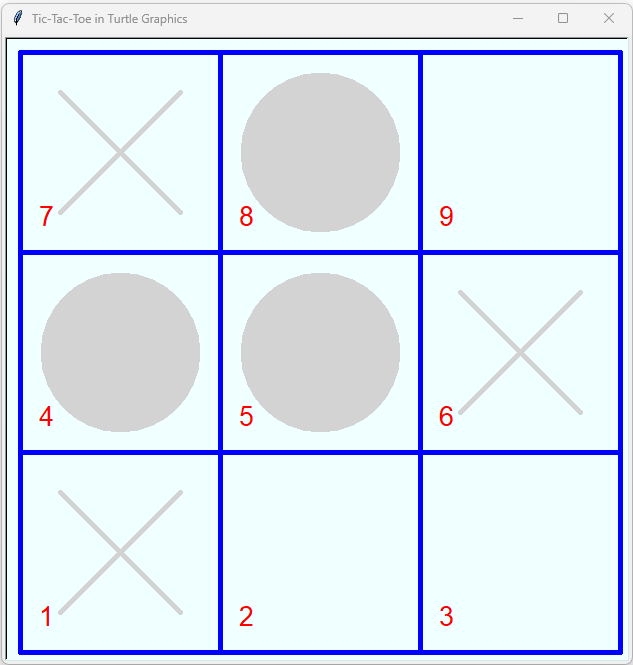

Both Player X and Player O have made three moves. Now it's Player X's turn. First, assume that Player X uses minimax tree search to find the best next move. Next, we'll count how many branches Player X has to search. 

## 1.1. Minimax Tree Search without Pruning

Without pruning, Player X will search over six different scenarios:
* Player X occupy 2; O occupy 3; X occupy 9; payoff to X is 0 and payoff to O is 0;
* Player X occupy 2; O occupy 9; X occupy 3; payoff to X is 1 and payoff to O is -1;
* Player X occupy 3; O occupy 2; payoff to X is -1 and payoff to O is 1;
* Player X occupy 3; O occupy 9; X occupy 2; payoff to X is 1 and payoff to O is -1;
* Player X occupy 9; O occupy 2; payoff to X is -1 and payoff to O is 1;
* Player X occupy 9; O occupy 3; X occupy 2; payoff to X is 0 and payoff to O is 0;

Since Player X knows that Player O chooses moves to maximize Player O's payoff, Player X anticipates the following outcomes:
* Player X occupy 2; O occupy 3; payoff to X is 0 and payoff to O is 0;
* Player X occupy 3; O occupy 2; payoff to X is -1 and payoff to O is 1;
* Player X occupy 9; O occupy 2; payoff to X is -1 and payoff to O is 1;

Therefore, Player X knows that her payoffs would be 0, -1 and -1, respectively if she were to choose cells 2, 3, and 9 in the next step. As a result, Player X will choose cell 2 in the next step. 

To summarize, without pruning, Player X needs to search for six different scenarios to come up with the best next move, which is cell 2. 

Next, we'll demonstrate that Player X can actually reach the same conclusion by searching over only four different scenarios by using alpha-beta pruning.  

## 1.2. Minimax Tree Search with Alpha-Beta Pruning
With alpha-beta pruning, we can exclude certain branches of the search tree to save time. This, in turn, makes the tree search algorithm more powerful because it allows the AI players to search more branches in a fixed amount of time and come up with better strategies. 

We use alpha and beta to denote the best outcomes so far for the first player and the second player, respectively. At any point of the search process, if alpha>-beta (or equivalently, beta>-alpha), we stop searching the branch. 

Now, let's go back to the example in the last subsection where Player X needs to decide to place a game piece in cell 2, 3, or 9. With alpha-beta pruning, we can reduce the number of searches. 

Before start searching, let's set alpha and beta to -2. Since the worst outcome for either player is -1 (i.e., losing the game), setting the initial value to -2 guarantee that we keep accurate record of the two players' best payoffs so far.

After searching over the first two paths
* Player X occupy 2; O occupy 3; X occupy 9; payoff to X is 0 and payoff to O is 0;
* Player X occupy 2; O occupy 9; X occupy 3; payoff to X is 1 and payoff to O is -1;

Player X knows that the outcome from placing a piece in cell 2 is a tie. So we record alpha=0 and beta=0. 

Next, player X starts to search on what happens if she places a piece in cell 3 instead. If she were to do that, Player O can place a piece in cell 2 and win. Therefore, after searching over the third path
* Player X occupy 3; O occupy 2; payoff to X is -1 and payoff to O is 1;

we update the value of beta to 1. At this point, since alpha>-beta (alpha is 1 and beta is 0), we don't need to spend time on the fourth scenario. 

Similarly, when player X starts to search on what happens if she places a piece in cell 9 instead, after searching over the fifth path
* Player X occupy 9; O occupy 2; payoff to X is -1 and payoff to O is 1;

we update the value of beta to 1. At this point, since beta>-alpha (or equivalently, alpha>-beta), we don't need to spend time on the sixth scenario. 

In summary, without alpha-beta pruning, Player X only needs to search for four different scenarios to come up with the best next move, which is also cell 2. 

## 1.3. Math behind the Alpha Beta Pruning
If we use the payoff to the first player to denote the game outcome, then the first palyer tries to maximize the game outcome while the second palyer tries to minimize the game outcome. Hence the name minimax algorithm.

In the example above, the game outcome as denoted by the payoff to the first player (player X) are as follows:
* Player X occupy 2; O occupy 3; X occupy 9; game outcome is 0;
* Player X occupy 2; O occupy 9; X occupy 3; game outcome is 1;
* Player X occupy 3; O occupy 2; game outcome is -1;
* Player X occupy 3; O occupy 9; X occupy 2; game outcome is 1;
* Player X occupy 9; O occupy 2; game outcome is -1;
* Player X occupy 9; O occupy 3; X occupy 2; game outcome is 0;

Therefore, the minimax algorithm comes up with the following solution:

`Game outcome = max{min{0,1},min{-1,1},min{-1,0}}`

which leads to 

`Game outcome = max{0,-1,-1}=0`

If we use the alpha-beta pruning, we can ignore path 4 and path 6, which leads to 

`Game outcome = max{min{0,1},min{-1,path4_outcome},min{-1,path6_outcome}}`

Since min{-1,?} cannot be greater than -1, while min{0,1}=0. The game outcome will be 0 no matter what the outcomes from path 4 and path 6 are. That is, we know for sure that 

`Game outcome = max{min{0,1},min{-1,path4_outcome},min{-1,path6_outcome}}=0`

without knowing the exact values of path4_outcome and path6_outcome. 

# 2. Alpha-Beta Pruning in Tic Tac Toe

In Chapter 5, you have seen that it took the minimax agent 29 seconds to make the first move in Tic Tac Toe. In this section, you'll learn to create a minimax agent with alpha-beta pruning and achieve the same results but less time. 

We'll modify the functions we used in Chapter 5 for the Tic Tac Toe minimax agent to incorporate the idea of alpha-beta pruning. 

## 2.1. The maximized_payoff_ttt() Function
We'll define a maximized_payoff_ttt() function. The function is similar to the maximized_payoff() function we defined in the Chapter 5. However, there are two important differences. First, the function keeps track of the best outcomes so far for players X and O and call them alpha and beta, respectively. Second, whenever the condition alpha>-beta (or equivalently beta>-alpha) is met, the algorithm stops searching the current branch.  

The maximized_payoff_ttt() function is defined as follows. It's saved in the file ch06util.py, which you can download from the book's GitHub repository. 

In [2]:
def maximized_payoff_ttt(env,reward,done,alpha,beta):
    # if the game has ended after the previous player's move
    if done:
        # if it's not a tie
        if reward!=0:
            return -1
        else:
            return 0
    if alpha==None:
        alpha=-2
    if beta==None:
        beta=-2
    if env.turn=="X":
        best_payoff = alpha
    if env.turn=="O":
        best_payoff = beta         
    # iterate through all possible moves
    for m in env.validinputs:
        env_copy=deepcopy(env)
        state,reward,done,info=env_copy.step(m)  
        # If I make this move, what's the opponent's response?
        opponent_payoff=maximized_payoff_ttt(env_copy,\
                                     reward,done,alpha,beta)
        # Opponent's payoff is the opposite of your payoff
        my_payoff=-opponent_payoff 
        if my_payoff > best_payoff:        
            best_payoff = my_payoff
            if env.turn=="X":
                alpha=best_payoff
            if env.turn=="O":
                beta=best_payoff 
        # skip the rest of the branch        
        if alpha>=-beta:
            break        
    return best_payoff         

Note this function applies to both Player X and Player O. The main difference here is that whenever the condition alpha>=-beta or beta>=-alpha is met, the player stop searching the rest of the branch when the hypothetical move m is taken. 

## 2.2. The minimax_ttt() Function
We also define a minimax_ttt() function to produce the best move for the minimax agent. Instead of using one function for player X and one for player O, we crate the minimax_ttt() function for both players. 

The minimax_ttt() function is defined as follows. It's saved in the file ch06util.py that you just downloaded. 

In [3]:
def minimax_ttt(env):
    wins=[]
    ties=[]
    losses=[]  
    # iterate through all possible next moves
    for m in env.validinputs:
        # make a hypothetical move and see what happens
        env_copy=deepcopy(env)
        state,reward,done,info=env_copy.step(m) 
        # If player X wins right away with move m, take it.
        if done and reward!=0:
            return m 
        # See what's the best response from the opponent
        opponent_payoff=maximized_payoff_ttt(env_copy,\
                                     reward,done,-2,-2)  
        # Opponent's payoff is the opposite of your payoff
        my_payoff=-opponent_payoff 
        if my_payoff==1:
            wins.append(m)
        elif my_payoff==0:
            ties.append(m)
        else:
            losses.append(m)
    # pick winning moves if there is any        
    if len(wins)>0:
        return choice(wins)
    # otherwise pick tying moves
    elif len(ties)>0:
        return choice(ties)
    return choice(losses)      

The minimax_ttt() function has just one argument: env, which is the game environment. It's similar to the minimax() function we defined in Chapter 5, with the exception that when a agent tries to figure out what's the opponent's payoff, the function maximized_payoff_ttt() is used.

## 2.3. Time Saved by Alpha-Beta Pruning
Next, we test how fast is the depth-pruned minimax agent. We let the agent play first again and measure how long it takes for the agent to make a move.

In [4]:
from utils.ch06util import minimax_ttt
from utils.ttt_simple_env import ttt
import time

# Initiate the game environment
env=ttt()
state=env.reset()   
# Play a full game manually
while True:
    # Mesure how long it takes to come up with a move
    start=time.time()
    action = minimax_ttt(env)
    end=time.time()
    print(f"Player X has chosen action={action}") 
    print(f"It took the agent {end-start} seconds")     
    state, reward, done, info = env.step(action)
    print(f"the current state is \n{state.reshape(3,3)}")
    if done:
        if reward==1:
            print(f"Player X has won!")  
        else:
            print("Game over, it's a tie!")
        break   
    action = input("Player O, what's your move?\n")
    print(f"Player O has chosen action={action}")    
    state, reward, done, info = env.step(int(action))
    print(f"the current state is \n{state.reshape(3,3)}")
    if done:
        print(f"Player O has won!") 
        break

Player X has chosen action=7
It took the agent 1.6124515533447266 seconds
the current state is 
[[0 0 0]
 [0 0 0]
 [1 0 0]]
Player O, what's your move?
6
Player O has chosen action=6
the current state is 
[[ 0  0  0]
 [ 0  0 -1]
 [ 1  0  0]]
Player X has chosen action=5
It took the agent 0.08851099014282227 seconds
the current state is 
[[ 0  0  0]
 [ 0  1 -1]
 [ 1  0  0]]
Player O, what's your move?
3
Player O has chosen action=3
the current state is 
[[ 0  0 -1]
 [ 0  1 -1]
 [ 1  0  0]]
Player X has chosen action=9
It took the agent 0.006987094879150391 seconds
the current state is 
[[ 0  0 -1]
 [ 0  1 -1]
 [ 1  0  1]]
Player O, what's your move?
1
Player O has chosen action=1
the current state is 
[[-1  0 -1]
 [ 0  1 -1]
 [ 1  0  1]]
Player X has chosen action=8
It took the agent 0.0009725093841552734 seconds
the current state is 
[[-1  0 -1]
 [ 0  1 -1]
 [ 1  1  1]]
Player X has won!


It took only 1.6 seconds for the minimax agent to make the first move, instead of 29 seconds when alpha-beta pruning is not used. That's a huge improvement on the efficiency of the algorithm without affecting the effectiveness of the agent. 

# 3. Test Minimax with Alpha-Beta Pruning
Next, we’ll make sure that the minimax algorith with alpha-beta pruning is as powerful as the minimax algorithm without pruning.  

Below, we play ten games between the two algorithms. We let the minimax agent with alpha-beta pruning play first in five games and play second in the other five, like so:

In [5]:
from utils.ch05util import minimax_X,minimax_O,test_ttt_game 
from utils.ch06util import minimax_ttt 

results=[]
for i in range(10):
    # minimax with pruning moves first if i is an even number
    if i%2==0:
        result=test_ttt_game(env,minimax_ttt,minimax_O)
        # record game outcome
        results.append(result)
    # minimax with pruning moves second if i is an odd number
    else:
        result=test_ttt_game(env,minimax_X,minimax_ttt)
        # record negative of game outcome
        results.append(-result)

We now count how many times the minimax agent with pruning has won and lost.

In [6]:
# count how many times minimax with pruning won
wins=results.count(1)
print(f"the minimax agent has won {wins} games")
# count how many times minimax with pruning lost
losses=results.count(-1)
print(f"the minimax agent has lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} times")          

the minimax agent has won 0 games
the minimax agent has lost 0 games
the game has tied 10 times


The above results show that all ten games are tied. This indicates that the minimax agent with alpha-beta pruning is as effective as the minimax agent without pruning. 

# 4. Alpha-Beta Pruning in Connect Four
In Connect Four, even with alpha-beta pruning, it still takes forever for the minimax agent to make a move if we don't using depth pruning. We therefore combine alpha-beta pruning with depth pruning to make the game faster. 

As in Chapter 3, we'll keep the depth to 3 so that we can compare the speed with and without alpha-beta pruning. 

## 4.1. Add Alpha-Beta Pruning in Connect Four
We first create a couple of functions in the local module ch06util.

In [7]:
def max_payoff_conn(env,reward,done,depth,alpha,beta):
    # if the game has ended after the previous player's move
    if done:
        # if it's not a tie
        if reward!=0:
            return -1
        else:
            return 0
    # If the maximum depth is reached, assume tie game
    if depth==0:
        return 0    
    if alpha==None:
        alpha=-2
    if beta==None:
        beta=-2
    if env.turn=="red":
        best_payoff = alpha
    if env.turn=="yellow":
        best_payoff = beta         
    # iterate through all possible moves
    for m in env.validinputs:
        env_copy=deepcopy(env)
        state,reward,done,info=env_copy.step(m)  
        # If I make this move, what's the opponent's response?
        opponent_payoff=max_payoff_conn(env_copy,\
                                reward,done,depth-1,alpha,beta)
        # Opponent's payoff is the opposite of your payoff
        my_payoff=-opponent_payoff 
        if my_payoff > best_payoff:        
            best_payoff = my_payoff
            if env.turn=="red":
                alpha=best_payoff
            if env.turn=="yellow":
                beta=best_payoff   
        # Skip the rest of the branch
        if alpha>=-beta:
            break        
    return best_payoff        

This function uses both depth pruning and alpha-beta pruning. It's similar to the max_payoff() function we defined in Chapter 5, but added in alpha-beta pruning. You can see the above function in the file ch06util.py as well.

Another function we define is minimax_conn(), as follows:

In [8]:
def minimax_conn(env,depth=3):
    wins=[]
    ties=[]
    losses=[]  
    # iterate through all possible next moves
    for m in env.validinputs:
        # make a hypothetical move and see what happens
        env_copy=deepcopy(env)
        state,reward,done,info=env_copy.step(m) 
        # If player X wins right away with move m, take it.
        if done and reward!=0:
            return m 
        # See what's the best response from the opponent
        opponent_payoff=max_payoff_conn(env_copy,\
                            reward,done,depth,-2,-2)  
        # Opponent's payoff is the opposite of your payoff
        my_payoff=-opponent_payoff 
        if my_payoff==1:
            wins.append(m)
        elif my_payoff==0:
            ties.append(m)
        else:
            losses.append(m)
    # pick winning moves if there is any        
    if len(wins)>0:
        return choice(wins)
    # otherwise pick tying moves
    elif len(ties)>0:
        return choice(ties)
    return choice(losses)      

It's similar to the function minimax() we defined in Chapter 5. Here we added in alpha-beta pruning in addition to the depth pruning. The default depth is 3, but you have the option to change it. 

## 4.2. Time Saved
Next, we play a game with the Connect Four minimax agent with both depth pruning and alpha-beta pruning. We use the default depth of 3, and play a game with the agent. We let the agent play first again and measure how long it takes for the agent to make a move.

In [9]:
from utils.ch06util import minimax_conn
from utils.conn_env import conn
import time

# Initiate the game environment
env=conn()
state=env.reset()   
# Play a full game manually
while True:
    # Mesure how long it takes to come up with a move
    start=time.time()
    action = minimax_conn(env,depth=3)
    end=time.time()
    print(f"The red player has chosen action={action}") 
    print(f"It took the agent {end-start} seconds")     
    state, reward, done, info = env.step(action)
    print(f"the current state is \n{state.T[::-1]}")
    if done:
        if reward==1:
            print(f"The red player has won!")  
        else:
            print("Game over, it's a tie!")
        break   
    action = input("Player yellow, what's your move?\n")
    print(f"Player yellow has chosen action={action}")    
    state, reward, done, info = env.step(int(action))
    print(f"the current state is \n{state.T[::-1]}")
    if done:
        if reward==-1:
            print(f"The yellow player has won!")  
        else:
            print("Game over, it's a tie!")
        break                   

The red player has chosen action=2
It took the agent 0.015507221221923828 seconds
the current state is 
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]]
Player yellow, what's your move?
7
Player yellow has chosen action=7
the current state is 
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0 -1]]
The red player has chosen action=1
It took the agent 0.029918909072875977 seconds
the current state is 
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0 -1]]
Player yellow, what's your move?
7
Player yellow has chosen action=7
the current state is 
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1]
 [ 1  1  0  0  0  0 -1]]
The red player has chosen action=3
It took the agent 0.04391336441040039

The above results show that it took about 0.015 seconds for the agent to play a move. This is about 10% of the time the agent spent in Chapter 5 when only depth pruning is used. 

## 4.3. Test Effectivenes 
We'll test if the minimax algorithm with alpha-beta pruning is as effective as the one without alpha-beta pruning. 

In [10]:
from utils.ch05util import minimax,test_conn_game 
from utils.ch06util import minimax_conn 

results=[]
for i in range(100):
    # minimax with pruning moves first if i is an even number
    if i%2==0:
        result=test_conn_game(env,minimax_conn,minimax)
        # record game outcome
        results.append(result)
    # minimax with pruning moves second if i is an odd number
    else:
        result=test_conn_game(env,minimax,minimax_conn)
        # record negative of game outcome
        results.append(-result)

We create a list *results* to store game outcomes. We simulate 100 games and half the time, the minimax agent with alpha-beta pruning moves first and the other half, the minimax agent without alpha-beta pruning moves first. This way, no player has a first-mover advantage and we have a fair assessment of the effectiveness of the two algorithms. Whenever the minimax algorithm with alpha-beta pruning moves second, we multiple the outcome by -1 so that a value 1 in the list *results* indicates that the minimax with alpha-beta pruning has won. 

In [11]:
# count how many times minimax with pruning won
wins=results.count(1)
print(f"the minimax agent has won {wins} games")
# count how many times minimax with pruning lost
losses=results.count(-1)
print(f"the minimax agent has lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} times")               

the minimax agent has won 35 games
the minimax agent has lost 45 games
the game has tied 20 times


the minimax agent has won 47 games
the minimax agent has lost 40 games
the game has tied 13 times

The above results show that the minimax agent with alpha-beta pruning has won 47 times and lost 40 times. This shows that the mimimax agent with alpha-beta pruning is as effective as the agent without alpha-beta pruning. Note that since the outcomes are random, you may get results showing that the minimax agent with alpha-beta pruning has lost more often than it has won. It that happens, run the above two cells again and see what happens. 